### Test

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [19]:

def npy_to_csv(npy_path, csv_path, feature_names=None):
    data = np.load(npy_path)
    num_samples, pred_len, num_features = data.shape
    data_2d = data.reshape(num_samples * pred_len, num_features)

    if feature_names is None:
        feature_names = [f'feature_{i}' for i in range(num_features)]

    df = pd.DataFrame(data_2d, columns=feature_names)
    df.to_csv(csv_path, index=False)
    print(f"Saved CSV to: {csv_path}")


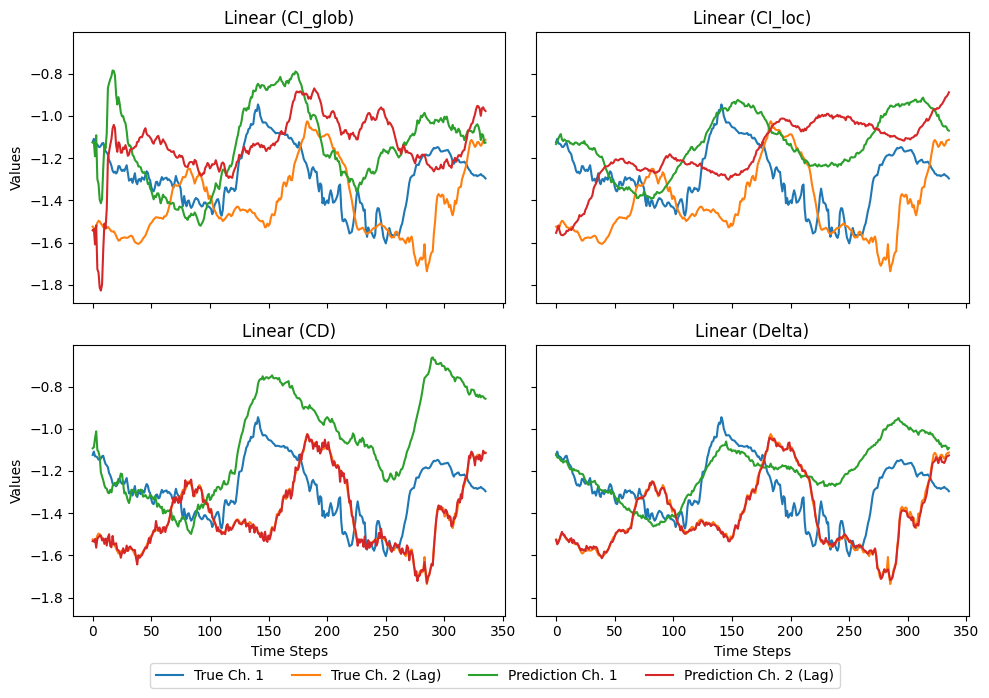

In [20]:

def load_last_336(csv_path):
    with open(csv_path) as f:
        total_rows = sum(1 for _ in f) - 1  # subtract header
    skip = max(total_rows - 336, 0)
    return pd.read_csv(csv_path, skiprows=range(1, skip + 1))

# === Define paths for all 4 models ===
base_dir = "/pfs/work9/workspace/scratch/ma_skral-SK_thesis_2025/Thesis_MTSF/PatchTST/PatchTST_supervised/results/"

paths = {
    "CI_glob": "_weather_shower_lag_336_T_degC_336_336_Linear_final_custom_ftM_sl336_ll48_pl336_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_rs2021_chCI_glob_cdwd0.0_Exp_0",
    "CI_loc": "_weather_shower_lag_336_T_degC_336_336_Linear_final_custom_ftM_sl336_ll48_pl336_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_rs2021_chCI_loc_cdwd0.0_Exp_0",
    "CD": "_weather_shower_lag_336_T_degC_336_336_Linear_final_custom_ftM_sl336_ll48_pl336_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_rs2021_chCD_cdwd0.0_Exp_0",
    "Delta": "_weather_shower_lag_336_T_degC_336_336_Linear_final_custom_ftM_sl336_ll48_pl336_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_rs2021_chDelta_cdwd0.0_Exp_0",
}

# === Setup subplots (2 rows, 2 cols) ===
fig, axes = plt.subplots(2, 2, figsize=(10, 7), sharex=True, sharey=True)
axes = axes.flatten()  # flatten for easy indexing

for ax, (label, path) in zip(axes, paths.items()):
    npy_paths = [f"{base_dir}{path}/true.npy", f"{base_dir}{path}/pred.npy"]
    csv_paths = [p.replace(".npy", ".csv") for p in npy_paths]

    # Convert to CSV if missing
    for npy_path, csv_path in zip(npy_paths, csv_paths):
        if not os.path.exists(csv_path):
            npy_to_csv(npy_path, csv_path)

    # Load only last 336 steps
    df_true = load_last_336(csv_paths[0])
    df_pred = load_last_336(csv_paths[1])

    df_true.to_pickle(f"data/Lag_336_Linear_{label}_True.pkl")
    df_pred.to_pickle(f"data/Lag_336_Linear_{label}_Pred.pkl")

    #df_true = pd.read_pickle(f"data/Lag_336_Linear_{label}_True.pkl")
    #df_pred = pd.read_pickle(f"data/Lag_336_Linear_{label}_Pred.pkl")


    ax.plot(df_true[f"feature_{1 - 1}"], label=f"True Ch. 1")
    ax.plot(df_true[f"feature_{2 - 1}"], label=f"True Ch. 2 (Lag)")

    ax.plot(df_pred[f"feature_{1 - 1}"], label=f"Prediction Ch. 1")
    ax.plot(df_pred[f"feature_{2 - 1}"], label=f"Prediction Ch. 2 (Lag)")
    
    ax.set_title(f"Linear ({label})")
    #ax.grid()

# Axis labels (shared where possible)
for ax in axes[:2]:
    ax.set_xlabel("")
for ax in axes[2:]:
    ax.set_xlabel("Time Steps")

for i in [0, 2]:
    axes[i].set_ylabel("Values")

# Shared Legend below all plots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.00))

plt.tight_layout(rect=[0, 0.03, 1, 1])  # Leave space for legend
os.makedirs("plots/Thesis", exist_ok=True)
plt.savefig("plots/Thesis/Lag_336_Linear_336_predictions.png", bbox_inches='tight', dpi=300)
plt.show()


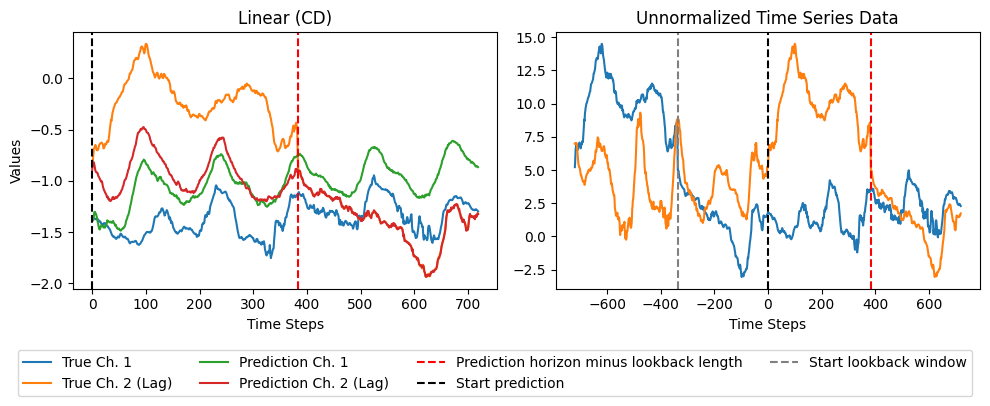

In [21]:
# --- Model prediction data ---
path = "_weather_shower_lag_720_T_degC_336_720_Linear_final_custom_ftM_sl336_ll48_pl720_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_rs2021_chCD_cdwd0.0_Exp_0"
base_dir = "/pfs/work9/workspace/scratch/ma_skral-SK_thesis_2025/Thesis_MTSF/PatchTST/PatchTST_supervised/results/"
npy_paths = [f"{base_dir}{path}/true.npy", f"{base_dir}{path}/pred.npy"]
csv_paths = [p.replace(".npy", ".csv") for p in npy_paths]

for npy_path, csv_path in zip(npy_paths, csv_paths):
    if not os.path.exists(csv_path):
        npy_to_csv(npy_path, csv_path)

def load_last_steps(csv_path, steps):
    with open(csv_path) as f:
        total_rows = sum(1 for _ in f) - 1  # subtract header
    skip = max(total_rows - steps, 0)
    return pd.read_csv(csv_path, skiprows=range(1, skip + 1))


df_true = load_last_steps(csv_paths[0], steps=720)
df_pred = load_last_steps(csv_paths[1], steps=720)

df_true.to_pickle(f"data/Lag_720_Linear_{label}_True.pkl")
df_pred.to_pickle(f"data/Lag_720_Linear_{label}_Pred.pkl")


#df_true = pd.read_pickle(f"data/Lag_720_Linear_{label}_True.pkl")
#df_pred = pd.read_pickle(f"data/Lag_720_Linear_{label}_Pred.pkl")

# --- Raw data ---
raw_df = pd.read_csv("/pfs/work9/workspace/scratch/ma_skral-SK_thesis_2025/Thesis_MTSF/PatchTST/PatchTST_supervised/dataset/_weather_shower_lag_720_T_degC.csv")
raw_df = raw_df[:-12]
raw_df = raw_df.iloc[-1440:].reset_index(drop=True)
raw_df.index = raw_df.index - 720

raw_df.to_pickle(f"data/Lag_720_Timeseries.pkl")
#raw_df = pd.read_pickle(f"data/Lag_720_Timeseries.pkl")

# --- Plotting ---
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=False)

ch_label_pred = f"pred_ch.{1}"
ch_label_true = f"true_ch.{1}"




axes[0].plot(df_true[f"feature_{1-1}"], label=f"True Ch. 1")#, color=colors[ch_label_true])
axes[0].plot(df_true[f"feature_{2-1}"], label=f"True Ch. 2 (Lag)")#, color=colors[ch_label_true])

axes[0].plot(df_pred[f"feature_{1-1}"], label=f"Prediction Ch. 1")#, color=colors[ch_label_pred])
axes[0].plot(df_pred[f"feature_{2-1}"], label=f"Prediction Ch. 2 (Lag)")#, color=colors[ch_label_pred])


axes[0].axvline(x=(1440-336+1-721), color='red', linestyle='--', label='Prediction horizon minus lookback length')
axes[0].axvline(x=0, color='black', linestyle='--', label='Start prediction')
axes[0].set_title("Linear (CD)")
axes[0].set_xlabel("Time Steps")
axes[0].set_ylabel("Values")
#axes[0].grid()


# --- Subplot 2: Raw Data with Lookback Windows ---
axes[1].plot(raw_df["T_degC"], label=None)#, color=colors["true_ch.1"])
axes[1].plot(raw_df["T_degC_LAG"], label=None)#, color=colors["true_ch.2"])
axes[1].axvline(x=0, color='black', linestyle='--', label='Start prediction')
axes[1].axvline(x=(720-336+1-721), color='grey', linestyle='--', label='Start lookback window')
axes[1].axvline(x=(1440-336+1-721), color='red', linestyle='--', label='Prediction horizon minus lookback length')
axes[1].set_title("Unnormalized Time Series Data")
axes[1].set_xlabel("Time Steps")
#axes[1].grid()



# --- Shared Legend (no duplicates) ---
# Only take one copy of each label
seen = set()
combined_handles_labels = []

for ax in axes:
    for h, l in zip(*ax.get_legend_handles_labels()):
        if l not in seen:
            combined_handles_labels.append((h, l))
            seen.add(l)

handles, labels = zip(*combined_handles_labels)
fig.legend(handles, labels, loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.02))

plt.tight_layout(rect=[0, 0.12, 1, 1])
os.makedirs("plots/Thesis", exist_ok=True)
plt.savefig("plots/Thesis/Lag_720_Linear_720_predictions.png", bbox_inches='tight', dpi=300)
plt.show()

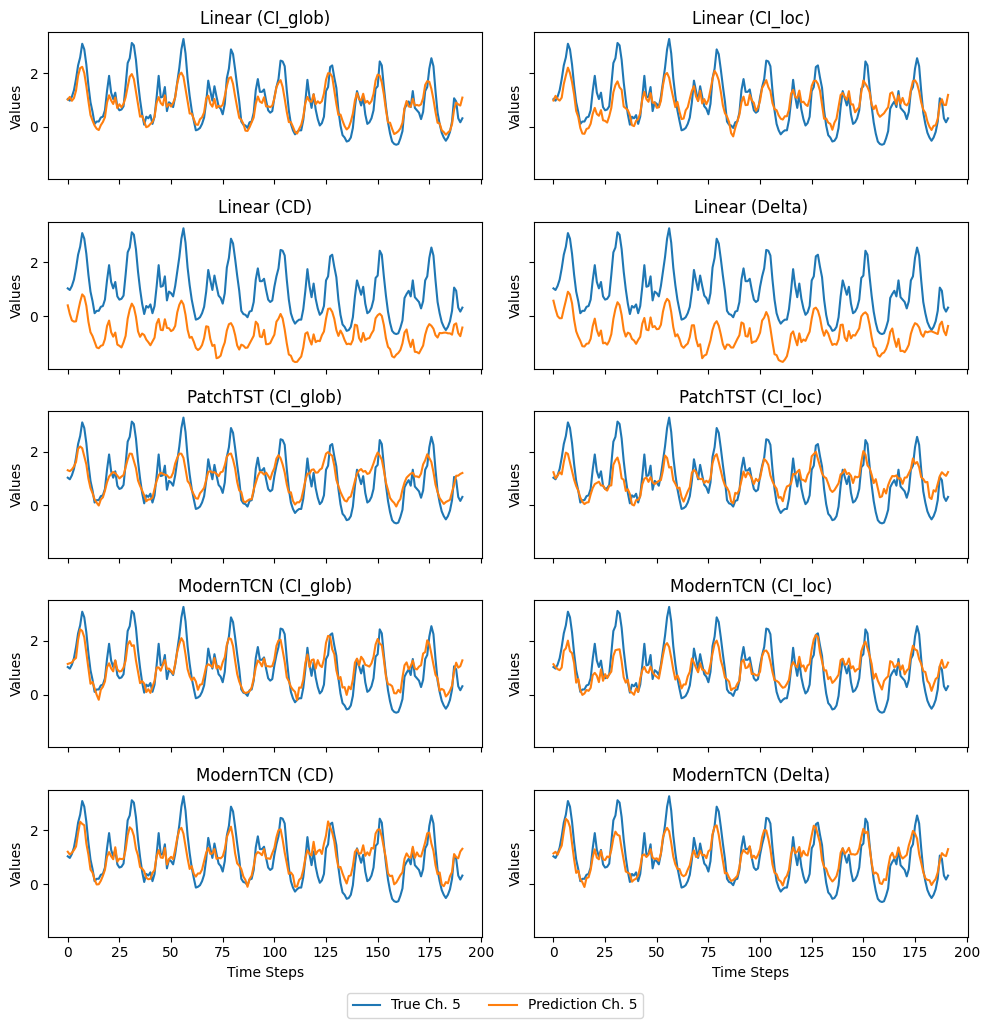

In [22]:
paths = [
    "ETTh1_336_192_Linear_final_ETTh1_ftM_sl336_ll48_pl192_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_rs2022_chCI_glob_cdwd0.0_Exp_0",
    "ETTh1_336_192_Linear_final_ETTh1_ftM_sl336_ll48_pl192_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_rs2022_chCI_loc_cdwd0.0_Exp_0",
    "ETTh1_336_192_Linear_final_ETTh1_ftM_sl336_ll48_pl192_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_rs2022_chCD_cdwd1.0_df1.0_p20_sk1_Exp_0",
    "ETTh1_336_192_Linear_final_ETTh1_ftM_sl336_ll48_pl192_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_rs2022_chDelta_cdwd1.0_df1.0_p20_sk1_Exp_0",
    "336_192_PatchTST_ETTh1_ftM_sl336_ll48_pl192_dm16_nh4_el3_dl1_df128_fc1_ebtimeF_dtTrue_rs2021_chCI_glob_cdwd0.0_Exp_0",
    "336_192_PatchTST_ETTh1_ftM_sl336_ll48_pl192_dm16_nh4_el3_dl1_df128_fc1_ebtimeF_dtTrue_rs2021_chCI_loc_cdwd0.0_Exp_0",
    "ETTh1_336_192_ModernTCN_ETTh1_ftM_sl336_ll48_pl192_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_rs2022_chCI_glob_cdwd0.0_Exp_0",
    "ETTh1_336_192_ModernTCN_ETTh1_ftM_sl336_ll48_pl192_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_rs2022_chCI_loc_cdwd0.0_Exp_0",
    "ETTh1_336_192_ModernTCN_ETTh1_ftM_sl336_ll48_pl192_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_rs2022_chCD_cdwd0.0_Exp_0",
    "ETTh1_336_192_ModernTCN_ETTh1_ftM_sl336_ll48_pl192_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_rs2022_chDelta_cdwd0.0_Exp_0",
]

def load_last_steps(csv_path, steps):
    with open(csv_path) as f:
        total_rows = sum(1 for _ in f) - 1
    skip = max(total_rows - steps, 0)
    return pd.read_csv(csv_path, skiprows=range(1, skip + 1))

# === Settings ===
channel = 5
steps = 192
base_dir = "/pfs/work9/workspace/scratch/ma_skral-SK_thesis_2025/Thesis_MTSF/PatchTST/PatchTST_supervised/results/"

#labels = ["Linear (CI global)", "Linear (CI local)", "Linear (CD)", "Linear (Delta)", "PatchTST (CI global)", "Patch (CI local)", "ModernTCN (CI global)", "ModernTCN (CI local)", "ModernTCN (CD)", "ModernTCN (Delta)"]
labels = ["Linear (CI_glob)", "Linear (CI_loc)", "Linear (CD)", "Linear (Delta)", "PatchTST (CI_glob)", "PatchTST (CI_loc)", "ModernTCN (CI_glob)", "ModernTCN (CI_loc)", "ModernTCN (CD)", "ModernTCN (Delta)"]

# === Plotting setup ===
fig, axes = plt.subplots(5, 2, figsize=(10, 10), sharex=True, sharey=True)
axes = axes.flatten()

count = 0  # reset here

for ax, path in zip(axes, paths):
    npy_paths = [f"{base_dir}{path}/true.npy", f"{base_dir}{path}/pred.npy"]
    csv_paths = [p.replace(".npy", ".csv") for p in npy_paths]

    for npy_path, csv_path in zip(npy_paths, csv_paths):
        if not os.path.exists(csv_path):
            npy_to_csv(npy_path, csv_path)

    if "Linear" in path:
        df_true = load_last_steps(csv_paths[0], steps * 228)
        df_pred = load_last_steps(csv_paths[1], steps * 228)
    elif "TCN" in path:
        df_true = load_last_steps(csv_paths[0], steps * 100)
        df_pred = load_last_steps(csv_paths[1], steps * 100)
    else:
        df_true = load_last_steps(csv_paths[0], steps * 228)
        df_pred = load_last_steps(csv_paths[1], steps * 228)

    df_true = df_true[:steps]
    df_pred = df_pred[:steps]

    df_true.to_pickle(f"data/ETTh1_192_{labels[count]}_True.pkl")
    df_pred.to_pickle(f"data/ETTh1_192_{labels[count]}_Pred.pkl")

    

    #df_true = pd.read_pickle(f"data/ETTh1_192_{labels[count]}_True.pkl")
    #df_pred = pd.read_pickle(f"data/ETTh1_192_{labels[count]}_Pred.pkl")




    ax.plot(df_true[f"feature_{channel - 1}"], label=f"True Ch. {channel}")
    ax.plot(df_pred[f"feature_{channel - 1}"], label=f"Prediction Ch. {channel}")
    
    ax.set_title(labels[count])
    ax.set_ylabel("Values")
    if labels[count] in ["ModernTCN (CD)", "ModernTCN (Delta)"]:
        ax.set_xlabel("Time Steps")
    #ax.grid()
    count += 1

# Labels & Legend
#axes[-1].set_xlabel("Time Steps")
#axes[0].set_ylabel("Values")

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", ncol=2, bbox_to_anchor=(0.5, -0.03))

plt.tight_layout(rect=[0, 0.00, 1, 1])
os.makedirs("plots/Thesis", exist_ok=True)
plt.savefig(f"plots/Thesis/ETTh1_ch-{channel}_multi_models_192.png", bbox_inches='tight', dpi=300)
plt.show()